# Categorical Cross-Entropy

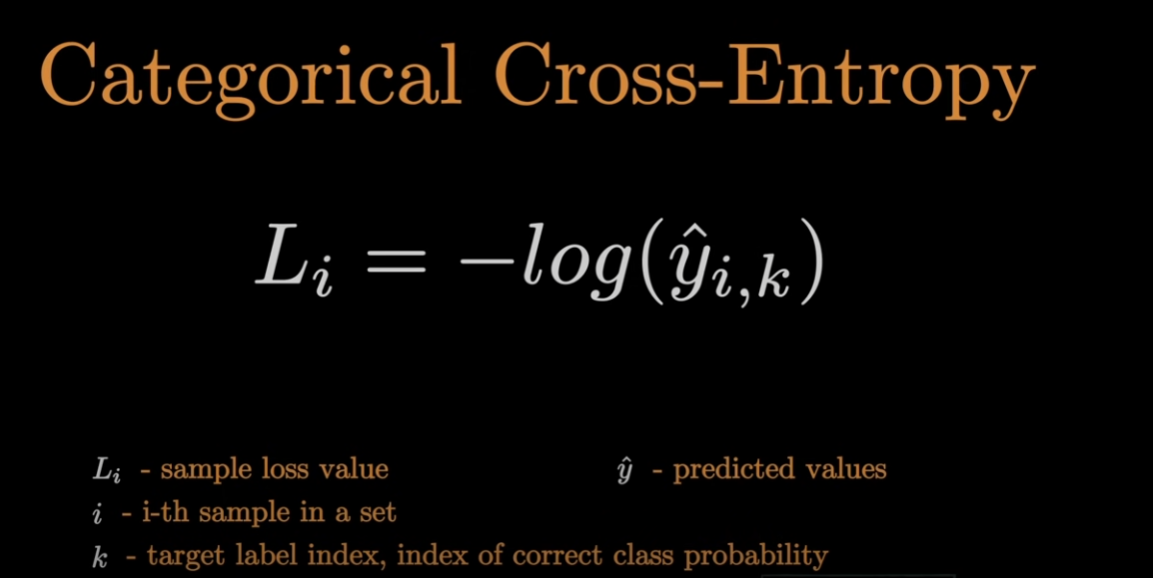

In [3]:
import numpy as np

softmax_output = [0.7, 0.1, 0.2]
target_output = [1,0,0]

loss = -(np.log(softmax_output[0])*target_output[0] +
        np.log(softmax_output[1])*target_output[1] +
        np.log(softmax_output[2])*target_output[2])

print(loss)

#since we are using 1 hot coding, we only need the index that is 1, since everything else is 0
loss = -(np.log(softmax_output[0]))
print(loss)

0.35667494393873245
0.35667494393873245


In [7]:
#create loss class

class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        
        data_loss = np.mean(sample_losses)
        
        return data_loss


class Loss_CategoricalCrossEntropy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)

        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)

        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]

        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1

            )
        
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods


